# Prueba Unidad 2
Realizado por: Tatiana Cárdenas

In [1]:
from IPython.display import Image

# Análisis del problema:
El golpe económico de la crisis sanitaria del corona virus no va a ser cosa de semanas, sino de meses. Dentro de una de las etapas importantes posteriores a las elecciones presidenciales son la re activación de los pequeños comercios y/o centros educativos. Para ello se plantea realizar  un modelo de simulación de eventos discretos que permita determinar cual son los principales factores para la re activación económica en el ingreso a las aulas de los estudiantes.

# Centro De EducaciÓn Inicial Particular "La Cometa"


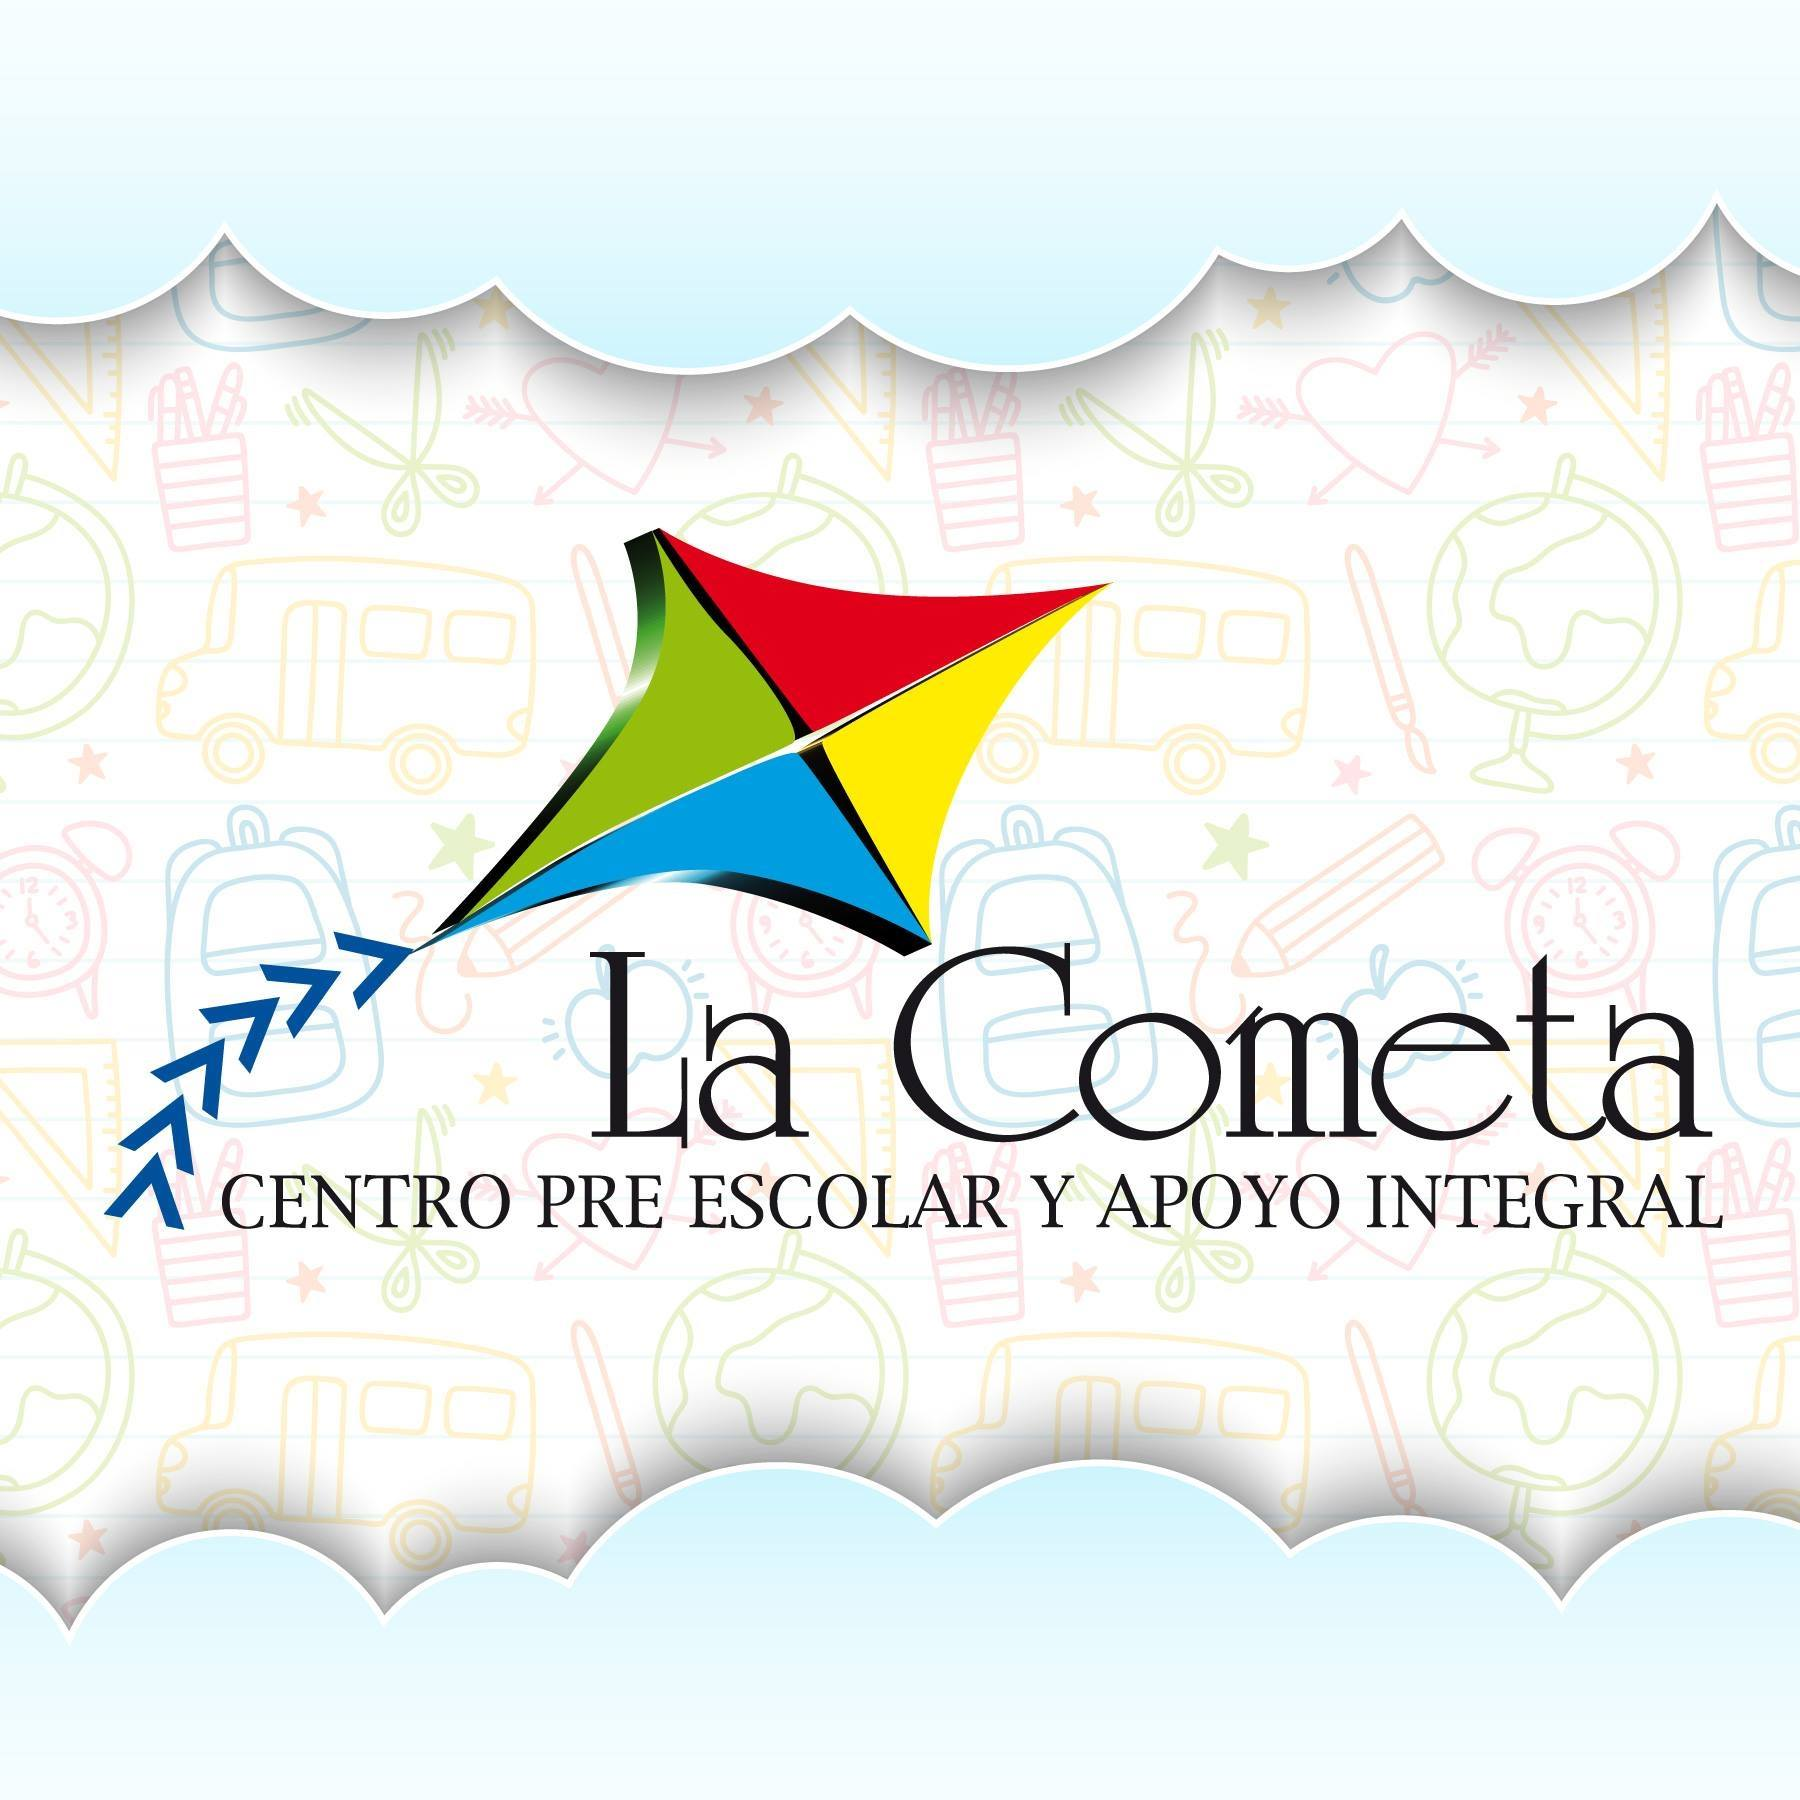

In [2]:
Image("logo-institucion.jpg", width=250, height=250)

La institución educativa Centro De Educación Inicial Particular La Cometa está identificado con el Ministerio de Educacción con el código 01H00220. La institución está ubicado en la Provincia de Azuay, Cantón Cuenca, Parroquia de HUAYNACAPAC.
La Institución Educativa es Particular Laico, el régimen escolar es Sierra, la modalidad es Presencial con jornada Matutina y Vespertina. Las instalaciones de la institución educativa Centro De EducaciÓn Inicial Particular La Cometa son Propio con acceso Terrestre.

Según la estadistica del 2012 proporcionada por eñ Ministerio de Educación del Ecuador – Institución del Estado ecuatoriano que garantiza el acceso y calidad de la Educación Inicial, Básica y Bachillerato a los y las habitantes del territorio nacional, en el Centro Pre Escolar y Apoyo Integral "La Cometa" existe 7 docente y 23 alumnos matriculados.

No obstante, en la página de Educación Ecuador, tenemos actualizada dicha estadistica del periodo lectivo 2018-2019, la cual presenta que hubieron:

* Docentes Femenino: 15
* Docentes Masculino: 2
* --> Total Docentes: 17
* Administrativos Femenino: 2
* Administrativos Masculino: 0
* --> Total Administrativos: 2
* Estudiantes Femenino: 42
* Estudiantes Masculino: 36
* --> Total Estudiantes: 78

__________________________________________________________________________________________________________________________

In [3]:
#Importación de librerías
import matplotlib.pyplot as plt
import simpy
import random as rand
import datetime 
from statistics import mean
import math

#Nueva libreria para graficas
import seaborn as sns
import pygal

print('Importadas')

Importadas


In [4]:
# Total docentes = 17
DOCENTES = 17

# Total estudiantes = 78
ESTUDIANTES = 78

#Personal a cargo de la prueba PCR
PERSONAL_PCR = 5

# Total de cursos = numEstudiantes / numDocentes
CURSOS = math.ceil(ESTUDIANTES/DOCENTES)

# Se tiene un promedio que el 90% de los docentes han sido vacunados
TOTAL_DOCENTES = int(DOCENTES*0.9)

#Dentro del procesos se tiene que alrededor del 5% - 10% de los estudiantes no podrán asistir debido a no presentar la vacuna/enfermedades.
TOTAL_ESTUDIANTES = int(ESTUDIANTES*0.8)

#Total de estudiantes contagiados en el receso
TOTAL_ESTUDIANTES_CONTAGIADOS = 0

#Periodo de prueba = 1 mes ** Se multiplica las horas de clase por 60 para obtener el total de minutos al dia 
PERIODO_PRUEBA = 30 #dias
TIEMPO_POR_DIA = (6*60)

# Tiempo Prueba PCR
TIEMPO_TOTAL_PRUEBA_PCR = 0

# Tiempo de prueba PCR de cada persona
TIEMPO_PRUEBA_PER_PERS = {}

# Distribución de estudiante por curso
ESTUDIANTE_PER_CURSO = {}

#Tienen un receso 30 minutos dentro del establecimiento 
RECESO_POR_DIA = 30

#Estudiantes PCR.
PRUEBA_PCR = 0

#Estudiantes contagiados
ESTUDIANTES_CONTAGIADOS = 0

#Estudiantes que no entrar a clases por vacuna o enfermedades
ESTUDIANTES_NO_CLASES = 0

TOTAL_PERSONAS = 0

#Cuantos estudiantes ingresan y salen al final del mes.
TOTAL_ESTUDIANTES_FIN_MES = 0

#Cuantos docentes ingresan y salen al final del mes.
TOTAL_DOCENTES_FIN_MES = 0

TIEMPO_SIMULACION = 40000


#Division de horas para los dos periodos de clases teniendo en cuenta que hay 1 recreo de 30 min
periodo1 = int(round(TIEMPO_POR_DIA-RECESO_POR_DIA)/2)
periodo2 = int(round(TIEMPO_POR_DIA-RECESO_POR_DIA)/2)

ESTUDIANTES_COMETA = {}

NO_CUMPLE = []
CONTAGIADOS_RECREO = []
ESTUDIANTES_CONTAGIADOS_RECREO = []

ESTUDIANTE_PRUEBA_10 = []


PRUEBA_PCR= []

PRUEBA_PCR_RESULTADO = []

prueba_pcr_preseleccion={}


Asignacion de un ID al estudiante

In [5]:
for i in range(TOTAL_ESTUDIANTES):
    ESTUDIANTES_COMETA[i]="NO",i

In [6]:
print(ESTUDIANTES_COMETA)

{0: ('NO', 0), 1: ('NO', 1), 2: ('NO', 2), 3: ('NO', 3), 4: ('NO', 4), 5: ('NO', 5), 6: ('NO', 6), 7: ('NO', 7), 8: ('NO', 8), 9: ('NO', 9), 10: ('NO', 10), 11: ('NO', 11), 12: ('NO', 12), 13: ('NO', 13), 14: ('NO', 14), 15: ('NO', 15), 16: ('NO', 16), 17: ('NO', 17), 18: ('NO', 18), 19: ('NO', 19), 20: ('NO', 20), 21: ('NO', 21), 22: ('NO', 22), 23: ('NO', 23), 24: ('NO', 24), 25: ('NO', 25), 26: ('NO', 26), 27: ('NO', 27), 28: ('NO', 28), 29: ('NO', 29), 30: ('NO', 30), 31: ('NO', 31), 32: ('NO', 32), 33: ('NO', 33), 34: ('NO', 34), 35: ('NO', 35), 36: ('NO', 36), 37: ('NO', 37), 38: ('NO', 38), 39: ('NO', 39), 40: ('NO', 40), 41: ('NO', 41), 42: ('NO', 42), 43: ('NO', 43), 44: ('NO', 44), 45: ('NO', 45), 46: ('NO', 46), 47: ('NO', 47), 48: ('NO', 48), 49: ('NO', 49), 50: ('NO', 50), 51: ('NO', 51), 52: ('NO', 52), 53: ('NO', 53), 54: ('NO', 54), 55: ('NO', 55), 56: ('NO', 56), 57: ('NO', 57), 58: ('NO', 58), 59: ('NO', 59), 60: ('NO', 60), 61: ('NO', 61)}


Asignacion de estudiantes a un curso

In [7]:
for i in range(TOTAL_ESTUDIANTES):
    ESTUDIANTE_PER_CURSO[i] = i, rand.randint(1,CURSOS)

In [8]:
def regresoClases(env, name, clases, **duration):
    rnd = rand.randint(1,ESTUDIANTES)
    no_entra_clases = 0
    si_entra_clases_uid = []
    if rnd <= 8:
        no_entra_clases+=1
        NO_CUMPLE.append(int(no_entra_clases))
        print(f'{name} No puede entrar a clases, ENFERMO/SIN VACUNA {round(env.now, 2)}')
        
    else:
        with clases.request() as req:
            yield req 
            #1: Entra a clases
            print(f'{name} Entra a clases a las {round(env.now)}')
            yield env.timeout(duration['entra_clases'])
            
            #2: Sale al recreo
            print(f'{name} Sale al recreo a las {round(env.now)}')
            yield env.timeout(duration['sale_recreo'])
            
            for i in range(len(ESTUDIANTES_COMETA)):
                contagio_recreo = 0
#                 aux = []
                
                rnd_recreo = rand.randint(1,len(ESTUDIANTES_COMETA))            
                if rnd_recreo < math.ceil(len(ESTUDIANTES_COMETA)*0.02):
                    
                    estudiante = ESTUDIANTES_COMETA[i][1]
            
                    contagio_recreo+=1

                    ESTUDIANTES_CONTAGIADOS_RECREO.append(estudiante)
                    CONTAGIADOS_RECREO.append(int(contagio_recreo))
                    
            #3: Regresa a clases
            print(f'{name} Regresa a clases a las {round(env.now)}')
            yield env.timeout(duration['regresa_clases'])

            #4: Entra a clases
            print(f'{name} Se va a la casa a las {round(env.now)}')
            yield env.timeout(duration['sale_casa'])
   
        #---------------PRUEBA PCR----------------#
        yield env.timeout(duration['pruebaPCR'])
        
        rnd_PCR = rand.randint(1,100)
        pruebaPCR = 0
        if rnd_PCR <= math.ceil(len(ESTUDIANTES_COMETA)*0.10):
            print(f'{name} para prueba PCR {round(env.now, 2)}')
            pruebaPCR=+1
            PRUEBA_PCR.append(int(pruebaPCR))
            print('Hasta aqui')
        
            rnd_PCR_SI = rand.randint(1,len(ESTUDIANTES_COMETA))
            rnd_resultado_pcr = 0
           
            if rnd_PCR_SI <= math.ceil(len(ESTUDIANTES_COMETA)*0.02):
                print('Hasta 1')
                print(f'{name} RESULTADO ** CONTAGIADO {round(env.now, 2)}')
                
                rnd_resultado_pcr=+1
                PRUEBA_PCR_RESULTADO.append(int(rnd_resultado_pcr))
        

In [9]:

env = simpy.Environment()

# Model restaurant that can only allow 2 customers at once
clases = simpy.Resource(env, capacity=TOTAL_ESTUDIANTES)
durations = {'entra_clases': periodo1, 'sale_recreo': RECESO_POR_DIA, 'regresa_clases': periodo2, 'sale_casa': 2, 'pruebaPCR':30}

#CONTAGIOS POR PRUEBA PCR
a = len(PRUEBA_PCR_RESULTADO)
if a == 0:
    print('NO HUBIERON CONTAGIADOS :) ')
else:
    print('Si hay contagiados,total',PRUEBA_PCR_RESULTADO)
    
#cursos = {}
for i in range(TOTAL_ESTUDIANTES):
    env.process(regresoClases(env, f'Estudiante {i}', clases, **durations))
env.run(until=TIEMPO_SIMULACION)

NO HUBIERON CONTAGIADOS :) 
Estudiante 2 No puede entrar a clases, ENFERMO/SIN VACUNA 0
Estudiante 17 No puede entrar a clases, ENFERMO/SIN VACUNA 0
Estudiante 23 No puede entrar a clases, ENFERMO/SIN VACUNA 0
Estudiante 24 No puede entrar a clases, ENFERMO/SIN VACUNA 0
Estudiante 25 No puede entrar a clases, ENFERMO/SIN VACUNA 0
Estudiante 54 No puede entrar a clases, ENFERMO/SIN VACUNA 0
Estudiante 0 Entra a clases a las 0
Estudiante 1 Entra a clases a las 0
Estudiante 3 Entra a clases a las 0
Estudiante 4 Entra a clases a las 0
Estudiante 5 Entra a clases a las 0
Estudiante 6 Entra a clases a las 0
Estudiante 7 Entra a clases a las 0
Estudiante 8 Entra a clases a las 0
Estudiante 9 Entra a clases a las 0
Estudiante 10 Entra a clases a las 0
Estudiante 11 Entra a clases a las 0
Estudiante 12 Entra a clases a las 0
Estudiante 13 Entra a clases a las 0
Estudiante 14 Entra a clases a las 0
Estudiante 15 Entra a clases a las 0
Estudiante 16 Entra a clases a las 0
Estudiante 18 Entra a cl

In [10]:
mylist = list(set(ESTUDIANTES_CONTAGIADOS_RECREO))

print(len(mylist))

39


In [11]:
print(PRUEBA_PCR_RESULTADO)

[1]


In [12]:
print(PRUEBA_PCR)

[1, 1, 1]


# Reportes:

In [13]:
print('Total de estudiantes:',ESTUDIANTES)
print('Total de estudiantes que ingresaron a clases:',TOTAL_ESTUDIANTES)
print('Total de estudiantes que no ingresaron a clases:',ESTUDIANTES-TOTAL_ESTUDIANTES)
print('Total de estudiantes que se contagiaron en el recreo:',len(mylist))
print('Personas que salieron positivo en las pruebas PCR:', len(PRUEBA_PCR_RESULTADO))
print('Se deben cerrar', len(PRUEBA_PCR_RESULTADO))


Total de estudiantes: 78
Total de estudiantes que ingresaron a clases: 62
Total de estudiantes que no ingresaron a clases: 16
Total de estudiantes que se contagiaron en el recreo: 39
Personas que salieron positivo en las pruebas PCR: 1
Se deben cerrar 1


# Gráficas representativas de los resultados:

In [14]:
print(ESTUDIANTES_COMETA)

{0: ('NO', 0), 1: ('NO', 1), 2: ('NO', 2), 3: ('NO', 3), 4: ('NO', 4), 5: ('NO', 5), 6: ('NO', 6), 7: ('NO', 7), 8: ('NO', 8), 9: ('NO', 9), 10: ('NO', 10), 11: ('NO', 11), 12: ('NO', 12), 13: ('NO', 13), 14: ('NO', 14), 15: ('NO', 15), 16: ('NO', 16), 17: ('NO', 17), 18: ('NO', 18), 19: ('NO', 19), 20: ('NO', 20), 21: ('NO', 21), 22: ('NO', 22), 23: ('NO', 23), 24: ('NO', 24), 25: ('NO', 25), 26: ('NO', 26), 27: ('NO', 27), 28: ('NO', 28), 29: ('NO', 29), 30: ('NO', 30), 31: ('NO', 31), 32: ('NO', 32), 33: ('NO', 33), 34: ('NO', 34), 35: ('NO', 35), 36: ('NO', 36), 37: ('NO', 37), 38: ('NO', 38), 39: ('NO', 39), 40: ('NO', 40), 41: ('NO', 41), 42: ('NO', 42), 43: ('NO', 43), 44: ('NO', 44), 45: ('NO', 45), 46: ('NO', 46), 47: ('NO', 47), 48: ('NO', 48), 49: ('NO', 49), 50: ('NO', 50), 51: ('NO', 51), 52: ('NO', 52), 53: ('NO', 53), 54: ('NO', 54), 55: ('NO', 55), 56: ('NO', 56), 57: ('NO', 57), 58: ('NO', 58), 59: ('NO', 59), 60: ('NO', 60), 61: ('NO', 61)}


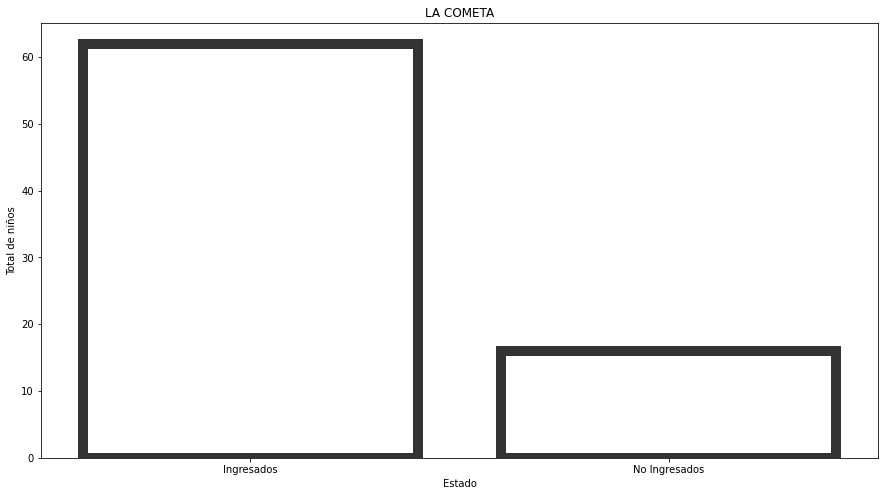

In [15]:
# A continuación se presenta la gráfica representativa de los vacunados vs los no vacunados
fig = plt.figure(figsize=(15,8))
plt.title('LA COMETA')
x = ['Ingresados', 'No Ingresados']
y = [TOTAL_ESTUDIANTES, ESTUDIANTES-TOTAL_ESTUDIANTES]
#current_palette = sns.color_palette()
#Seaborn
sns.barplot(x=x, y=y,linewidth=10, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")
plt.xlabel('Estado')
plt.ylabel('Total de niños')
plt.show()

# Resultados:
* Al ser una institución bastante pequeña es necesario agrandar los porcentajes para poder medir a los estudiantes ya que al no tener tantos estudiantes, no se pudo encontrar un estudiante que de positivo en la prueba PCR, por ende, no se pudo cerrar un curso como tal, por tal motivo es importante ampliar los rangos de porcentaje o tener un tipo de rango de acuerdo al número de población que va a participar en la simulación.
* En el presente modelo se ha simulado de manera exitosa una institución pequeña que es una Escuela de educación inicial, la cual se presenta el primer periodo, el recreo, el segundo periodo y después la salida. Algunas instituciones poseen 2 recreos por lo que también es importante hacer un analisis previo para poder simular un evento discreto de ese tipo.

# Referencias:
* https://educacion.gob.ec/wp-content/uploads/downloads/2012/08/AZUAY11.pdf
* https://educacionecuador.com/listings/centro-de-educacion-inicial-particular-la-cometa/
